EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

In [3]:
test_df=pd.read_csv('Data/test.csv')
original_train_df=pd.read_csv('Data/train.csv')

In [4]:
original_train_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
original_train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [51]:
def draw_distplot(df, field_name):
    # Get the fitted parameters describing the distribution
    (mu, sigma) = norm.fit(df[field_name])

    fig, axes = plt.subplots(1,2,figsize = (16, 10))

    ax11 = plt.subplot(2,2,1)
    sns.distplot(df[field_name], fit=norm,kde=False, ax = ax11);

    #Now plot the distribution
    ax11.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    #ax11.ylabel('Normalized Frequency')
    #ax11.title('count distribution')

    ax12 = plt.subplot(2,2,2)
    stats.probplot(df[field_name], plot=ax12)
    ax12.set_title('distribution of {}'.format(field_name))


In [48]:
fields =['count', 'registered', 'casual', 'windspeed', 'humidity', 'atemp', 'temp', 'weather', 'workingday', 'holiday', 'season']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: 'Text' object is not callable

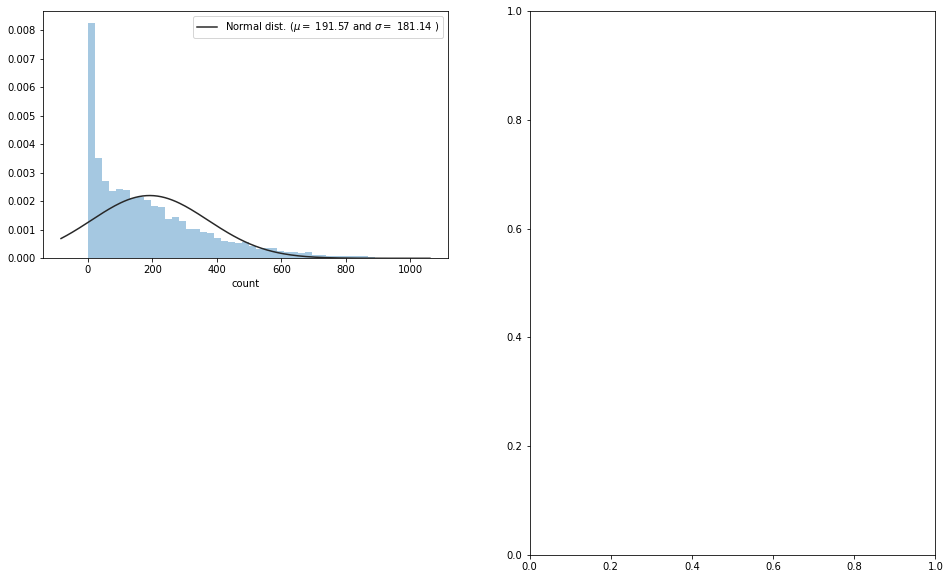

In [52]:
for field in fields:
    draw_distplot(original_train_df, field)

<AxesSubplot:>

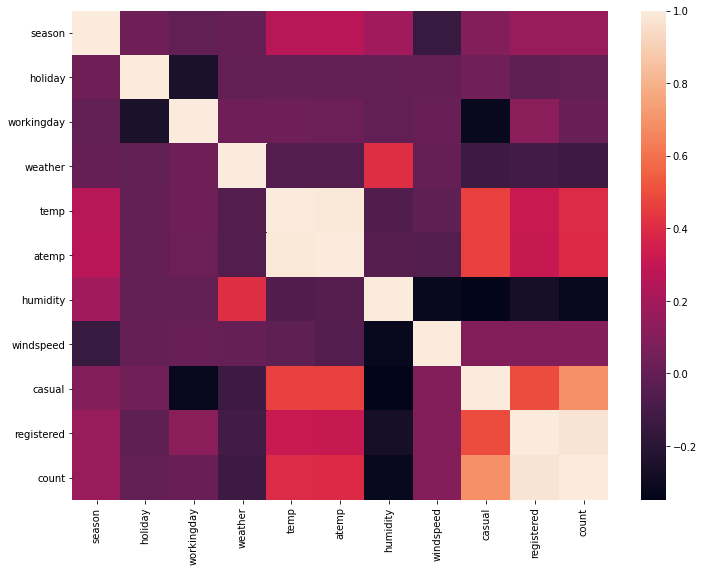

In [43]:
corr = original_train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr)

In [46]:
MINIMUM_CORR = 0.00
correlated_features = corr[np.logical_or(corr['count']>MINIMUM_CORR, corr['count']< -MINIMUM_CORR )]
correlated_features['count'].sort_values()

humidity     -0.317371
weather      -0.128655
holiday      -0.005393
workingday    0.011594
windspeed     0.101369
season        0.163439
atemp         0.389784
temp          0.394454
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64